*   Multimídia - Imagem I (Exercício 4)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

In [ ]:
#Função que retorna as matrizes referentes aos canais de uma imagem colorida, isto é, as matrizes R, G e B.
def getRGB(im):

  #Dimensões da imagem
  n_rows, n_columns = im.size

  #Pixels da imagem
  pixel = im.load()

  #Matrizes que serão armazenados os 3 canais
  R = np.empty(im.size)
  G = np.empty(im.size)
  B = np.empty(im.size)

  #Laço para percorrer toda a imagem
  for i in range(n_rows):

    for j in range(n_columns):

      #Obtenção dos três valores de cada pixel, armazenando em cada matriz
      R[i, j] = pixel[i, j][0]
      G[i, j] = pixel[i, j][1]
      B[i, j] = pixel[i, j][2]

  return R, G, B

In [ ]:
#Função que realiza a conversão das matrizes RBG em HSI
def rgb2hsi(im, R, G, B):

  n_rows, n_columns = im.size

  H = np.empty(im.size)
  S = np.empty(im.size)
  I = np.empty(im.size)

  #Laço que percorre as três matrizes RGB e aplica as equações necessárias para a obtenção das matrizes HSI
  for i in range(n_rows):

    for j in range(n_columns):

      R[i, j] /= 255
      G[i, j] /= 255
      B[i, j] /= 255 

      I[i, j] = (R[i, j] + G[i, j] + B[i, j]) / 3

      if (R[i, j] == G[i, j]) and (G[i, j] == B[i, j]):

        S[i, j] = H[i, j] = 0
    
      else:

        S[i, j] = 1 - (1 / I[i, j]) * (min(R[i, j], G[i, j], B[i, j]))

        num = R[i, j] - G[i, j] / 2 - B[i, j] / 2

        den = np.sqrt((R[i, j] - G[i, j]) * (R[i, j] - G[i, j]) + (R[i, j] - B[i, j]) * (G[i, j] - B[i, j]))

        teta = np.arccos(round((num / den), 5))

        if B[i, j] <= G[i, j]:

          H[i, j] = teta

        else:

          H[i, j] = 2 * np.pi - teta
      
        H[i, j] *= 180 / np.pi

      #Normalização dos valores obtidos, passando do intervalo (0 : 1) e (0 : 360) para o intervalo de (0 : 255), devido a quantização de 8 bits      
      I[i , j] = round(255 * I[i, j])
      S[i , j] = round(255 * S[i, j])
      H[i , j] = round((255 / 360) * H[i, j])

  return H, S, I

In [ ]:
#Função que realiza a conversão das matrizes HSI em RGB
def hsi2rgb(im, H, S, I):

  n_rows, n_columns = im.size

  R = np.empty(im.size)
  G = np.empty(im.size)
  B = np.empty(im.size)

  #Fator de conversão da unidade grau para radiano
  rad = np.pi / 180

  #Conversão de tipo, de int para float
  I = I.astype('float')

  #Laço que percorre as três matrizes HSI e aplica as equações necessárias para a obtenção das matrizes RGB
  for i in range(n_rows):

    for j in range(n_columns):

      H[i, j] *= 360 / 255
      S[i, j] /= 255
      I[i, j] /= 255

      trans = I[i, j] * (1 - S[i, j])

      if ((H[i, j] >= 0) and (H[i, j] < 120)) or (H[i, j] == 360):

        num = S[i, j] * np.cos(rad * H[i, j])

        den = np.cos(rad * (60 - H[i, j]))

        R[i, j] = I[i, j] * (1 + (num / den))

        B[i, j] = trans

        G[i, j] = 3 * I[i, j] - (R[i, j] + B[i, j])
      
      if (H[i, j] >= 120) and (H[i, j] < 240):

        H[i, j] -= 120

        num = S[i, j] * np.cos(rad * H[i, j])

        den = np.cos(rad * (60 - H[i, j]))

        G[i, j] = I[i, j] * (1 + (num / den))

        R[i, j] = trans

        B[i, j] = 3 * I[i, j] - (R[i, j] + G[i, j])

      if (H[i, j] >= 240) and (H[i, j] < 360):

        H[i, j] -= 240

        num = S[i, j] * np.cos(rad * H[i, j])

        den = np.cos(rad * (60 - H[i, j]))

        B[i, j] = I[i, j] * (1 + (num / den))

        G[i, j] = trans

        R[i, j] = 3 * I[i, j] - (G[i, j] + B[i, j])


      #Normalização dos valores de RGB, retornando ao intervalo (0 : 255)
      R[i , j] = round(255 * R[i, j])
      G[i , j] = round(255 * G[i, j])
      B[i , j] = round(255 * B[i, j])

  return R, G, B

In [ ]:
#Função que realiza o cálculo do histograma de um conjunto de dados armazenados em uma matriz.
def getHistogram(M, quant):

    M = M.astype('uint8')

    #Vetor que será armazenado o histograma, com o tamanho igual a quantidade de níveis disponíveis de acordo com a quantização
    #Nesse caso, a quatização é de 8 bits, ou seja, 2^8 = 256 níveis distintos
    histogram = np.zeros(quant)
    
    #Laço que analisa cada pixel do vetor e realiza a contagem de cada valor e determina a quantidade de cada nível na imagem
    for i in M:

        histogram[i] += 1
  
    return histogram

In [ ]:
#Função que realiza a soma cumulativa, necessária para o cálculo da distribuição de probabilidade acumuldada
def cumulative(M):

  #A função "iter" torna o array M "iterável", estabelecendo um contador setado em 0 que será utilizado no índice do array
  #Cada vez que a função "next" é invocada, o contador é incrementado e o elemento retornado é o próximo da lista 
  M = iter(M)
  out = [next(M)]

  for i in M:

    #No laço, cada elemento do array M é é somado ao valor anterior, formando assim a soma acumulada
    out.append(out[-1] + i)

  return np.array(out)

In [ ]:
#Função que calcula o MSE entre duas imagens
def mse(im_1, im_2):

  #Dimensões das imagens
  n_rows, n_columns = im_1.size

  NM = n_rows * n_columns

  #Pixels das imagens
  pixel_1 = im_1.load()
  pixel_2 = im_2.load()

  #Valores que serão armazenados as medidas dos 3 canais
  MSE_R = MSE_B = MSE_G = 0

  #Laço para percorrer as imagens
  for i in range(n_rows):

    for j in range(n_columns):

      #Obtenção dos três valores de cada pixel, calculando o MSE para cada canal
      MSE_R = (pixel_2[i, j][0] - pixel_1[i, j][0]) ** 2 + MSE_R
      MSE_G = (pixel_2[i, j][1] - pixel_1[i, j][1]) ** 2 + MSE_G
      MSE_B = (pixel_2[i, j][2] - pixel_1[i, j][2]) ** 2 + MSE_B

  return MSE_R / NM, MSE_G / NM, MSE_B / NM

Nesse programa, será realizada uma análise da mudança de uma imagem devido a equalização de um canal. Primeiro, a imagem será obtida. Após, será realizada uma separação dos canais RGB da imagem. Depois, a conversão de RGB para HSI. Então, será realizada uma equalização do canal I. Finalmente, os canais HSI serão novamente convertidos para RGB e novamente reunidos para a representação da imagem de 3 canais.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


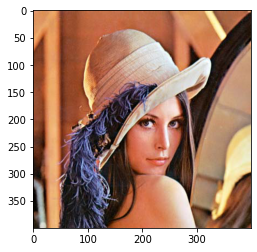

In [ ]:
#Imagem 1

#Obtenção da imagem
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Colab Notebooks/dados/'

im = Image.open(root_path + 'e16.jpg')

#Mostrar a imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 1

#Obtenção dos canais RGB
R, G, B = getRGB(im)

#Conversão RGB para HSI
H, S, I = rgb2hsi(im, R, G, B)

#Conversão as matrizes HSI em vetores para a plotagem do histograma
H_vet = H.flatten()
S_vet = S.flatten()
I_vet = I.flatten()

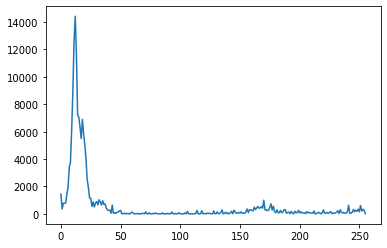

In [ ]:
#Imagem 1

#Obtenção do histograma do canal H
hist_H = getHistogram(H_vet, 256)

plt.plot(hist_H)

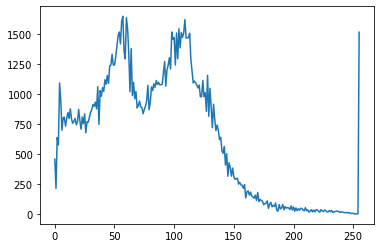

In [ ]:
#Imagem 1

#Obtenção do histograma do canal S
hist_S = getHistogram(S_vet, 256)

plt.plot(hist_S)

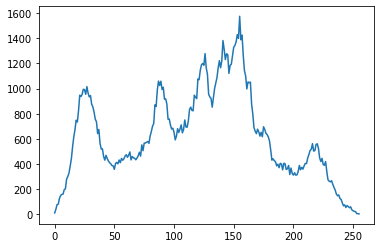

In [ ]:
#Imagem 1

#Obtenção do histograma do canal I
hist_I = getHistogram(I_vet, 256)

plt.plot(hist_I)

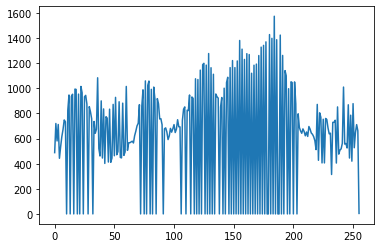

In [ ]:
#Imagem 1

#Soma cumulativa do canal I
sum_I = cumulative(hist_I)

#Normalizar a soma cumulativa
num = (sum_I - sum_I.min()) * 255
den = sum_I.max() - sum_I.min()
sum_I = num / den

#Conversão de float para int
sum_I = sum_I.astype('uint8')

#conversão de float para int da matriz do canal I
I_vet = I_vet.astype('uint8')

#Cálculo da nova matriz I, após o processo de equalização
I_new = sum_I[I_vet]

#Cálculo do histograma do canal I após equalização
hist_I = getHistogram(I_new, 256)

#Plotagem do novo histograma 
plt.plot(hist_I)

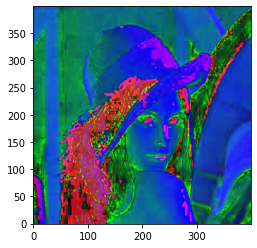

In [ ]:
#Imagem 1

n_rows, n_columns = im.size

#Tranformação do vetor do canal I em uma matriz
I = I_new.reshape(n_rows, n_columns)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
HSI_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após os processos 
HSI_array[..., 0] = H
HSI_array[..., 1] = S
HSI_array[..., 2] = I

#Transformar o vetor de matrizes em uma imagem de três canais (HSI)
final = Image.fromarray(HSI_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

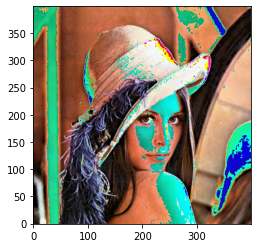

In [ ]:
#Imagem 1

#Obtenção dos canais RGB após a modificação do canal I
R, G, B = hsi2rgb(im, H, S, I)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após os processos
RGB_array[..., 0] = R
RGB_array[..., 1] = G
RGB_array[..., 2] = B

#Transformar o vetor de matrizes em uma imagem de três canais (RGB)
final = Image.fromarray(RGB_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

In [ ]:
#Imagem 1

#Obtenção dos valores de MSE dos canais RGB entre a imagem 1 e a imagem modificada
MSE_R, MSE_G, MSE_B = mse(im, final)

print("MSE do canal R: ", MSE_R)
print("MSE do canal G: ", MSE_G)
print("MSE do canal B: ", MSE_B)

MSE do canal R:  13802.63634375
MSE do canal G:  8735.09680625
MSE do canal B:  6845.7865875


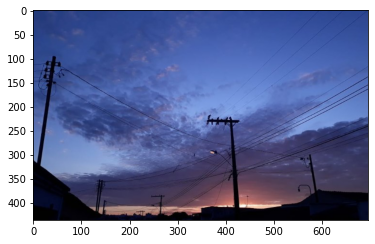

In [ ]:
#Imagem 2

#Obtenção da imagem
im = Image.open(root_path + 'h3.jpg')

#Mostrar a imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 2

#Obtenção dos canais RGB
R, G, B = getRGB(im)

#Conversão RGB para HSI
H, S, I = rgb2hsi(im, R, G, B)

#Conversão as matrizes HSI em vetores para a plotagem do histograma
H_vet = H.flatten()
S_vet = S.flatten()
I_vet = I.flatten()

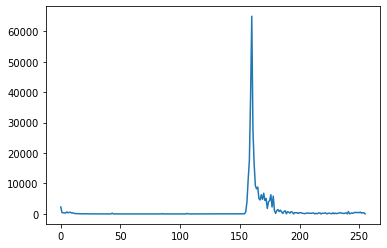

In [ ]:
#Imagem 2

#Obtenção do histograma do canal H
hist_H = getHistogram(H_vet, 256)

plt.plot(hist_H)

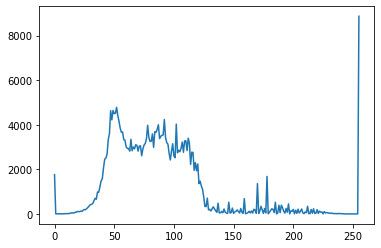

In [ ]:
#Imagem 2

#Obtenção do histograma do canal S
hist_S = getHistogram(S_vet, 256)

plt.plot(hist_S)

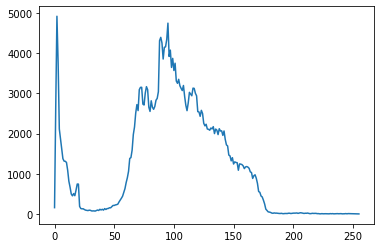

In [ ]:
#Imagem 2

#Obtenção do histograma do canal I
hist_I = getHistogram(I_vet, 256)

plt.plot(hist_I)

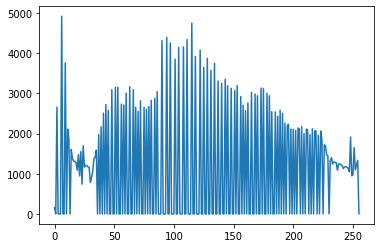

In [ ]:
#Imagem 2

#Soma cumulativa do canal I
sum_I = cumulative(hist_I)

#Normalizar a soma cumulativa
num = (sum_I - sum_I.min()) * 255
den = sum_I.max() - sum_I.min()
sum_I = num / den

#Conversão de float para int
sum_I = sum_I.astype('uint8')

#conversão de float para int da matriz do canal I
I_vet = I_vet.astype('uint8')

#Cálculo da nova matriz I, após o processo de equalização
I_new = sum_I[I_vet]

#Cálculo do histograma do canal I após equalização
hist_I = getHistogram(I_new, 256)

#Plotagem do novo histograma 
plt.plot(hist_I)

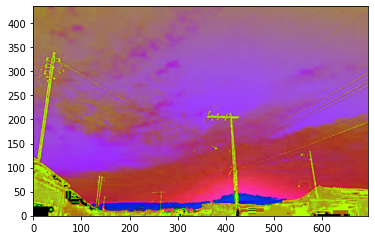

In [ ]:
#Imagem 2

n_rows, n_columns = im.size

#Tranformação do vetor do canal I em uma matriz
I = I_new.reshape(n_rows, n_columns)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
HSI_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após os processos 
HSI_array[..., 0] = H
HSI_array[..., 1] = S
HSI_array[..., 2] = I

#Transformar o vetor de matrizes em uma imagem de três canais (HSI)
final = Image.fromarray(HSI_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

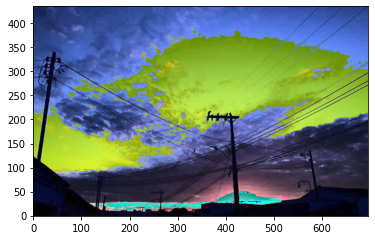

In [ ]:
#Imagem 2

#Obtenção dos canais RGB após a modificação do canal I
R, G, B = hsi2rgb(im, H, S, I)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após os processos
RGB_array[..., 0] = R
RGB_array[..., 1] = G
RGB_array[..., 2] = B

#Transformar o vetor de matrizes em uma imagem de três canais (RGB)
final = Image.fromarray(RGB_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

In [ ]:
#Imagem 2

#Obtenção dos valores de MSE dos canais RGB entre a imagem 2 e a imagem modificada
MSE_R, MSE_G, MSE_B = mse(im, final)

print("MSE do canal R: ", MSE_R)
print("MSE do canal G: ", MSE_G)
print("MSE do canal B: ", MSE_B)

MSE do canal R:  1544.084984139102
MSE do canal G:  1823.078369947218
MSE do canal B:  8190.7580324589


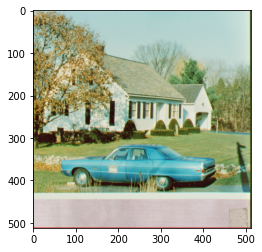

In [ ]:
#Imagem 3

#Obtenção da imagem
im = Image.open(root_path + 'house.tiff')

#Mostrar a imagem original
plt.imshow(im, 'gray', origin = 'upper')
plt.show()

In [ ]:
#Imagem 3

#Obtenção dos canais RGB
R, G, B = getRGB(im)

#Conversão RGB para HSI
H, S, I = rgb2hsi(im, R, G, B)

#Conversão as matrizes HSI em vetores para a plotagem do histograma
H_vet = H.flatten()
S_vet = S.flatten()
I_vet = I.flatten()

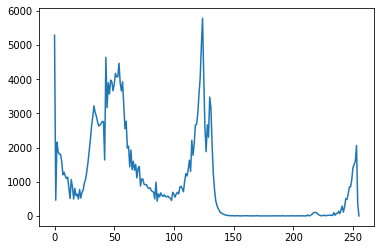

In [ ]:
#Imagem 3

#Obtenção do histograma do canal H
hist_H = getHistogram(H_vet, 256)

plt.plot(hist_H)

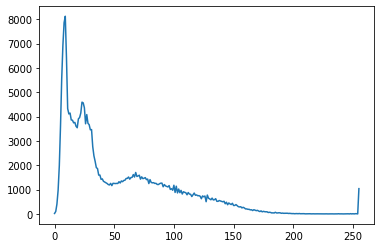

In [ ]:
#Imagem 3

#Obtenção do histograma do canal S
hist_S = getHistogram(S_vet, 256)

plt.plot(hist_S)

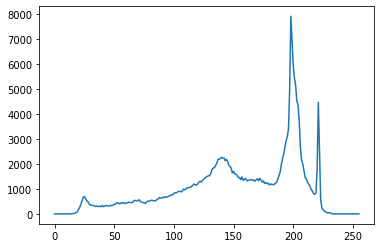

In [ ]:
#Imagem 3

#Obtenção do histograma do canal I
hist_I = getHistogram(I_vet, 256)

plt.plot(hist_I)

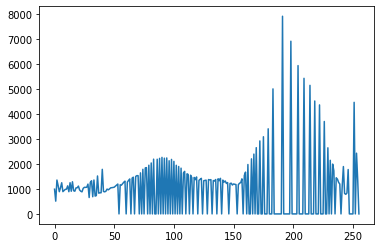

In [ ]:
#Imagem 3

#Soma cumulativa do canal I
sum_I = cumulative(hist_I)

#Normalizar a soma cumulativa
num = (sum_I - sum_I.min()) * 255
den = sum_I.max() - sum_I.min()
sum_I = num / den

#Conversão de float para int
sum_I = sum_I.astype('uint8')

#conversão de float para int da matriz do canal I
I_vet = I_vet.astype('uint8')

#Cálculo da nova matriz I, após o processo de equalização
I_new = sum_I[I_vet]

#Cálculo do histograma do canal I após equalização
hist_I = getHistogram(I_new, 256)

#Plotagem do novo histograma 
plt.plot(hist_I)

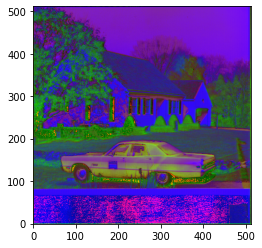

In [ ]:
#Imagem 3

n_rows, n_columns = im.size

#Tranformação do vetor do canal I em uma matriz
I = I_new.reshape(n_rows, n_columns)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
HSI_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após os processos 
HSI_array[..., 0] = H
HSI_array[..., 1] = S
HSI_array[..., 2] = I

#Transformar o vetor de matrizes em uma imagem de três canais (HSI)
final = Image.fromarray(HSI_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

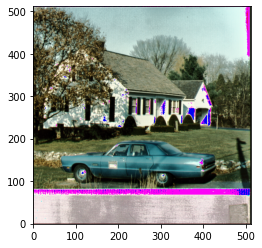

In [ ]:
#Imagem 3

#Obtenção dos canais RGB após a modificação do canal I
R, G, B = hsi2rgb(im, H, S, I)

#Vetor de matrizes de três posições, onde cada posição armazena uma matriz, referente a cada canal
#Isto é, o seguinte comando realiza uma junção dos canais que foi separado anteriormente, para reaver a imagem com as modificações realizadas
RGB_array = np.empty((n_rows, n_columns, 3), 'uint8')

#Preenchimento do vetor com as matrizes finais obtidas após os processos
RGB_array[..., 0] = R
RGB_array[..., 1] = G
RGB_array[..., 2] = B

#Transformar o vetor de matrizes em uma imagem de três canais (RGB)
final = Image.fromarray(RGB_array)

#Mostrar a imagem modificada
plt.imshow(np.rot90(final), 'gray', origin = 'lower')
plt.show()

In [ ]:
#Imagem 3

#Obtenção dos valores de MSE dos canais RGB entre a imagem 3 e a imagem modificada
MSE_R, MSE_G, MSE_B = mse(im, final)

print("MSE do canal R: ", MSE_R)
print("MSE do canal G: ", MSE_G)
print("MSE do canal B: ", MSE_B)

MSE do canal R:  8736.420372009277
MSE do canal G:  9824.700256347656
MSE do canal B:  11601.720783233643
